# Student: Rafael Santos  #HomeWork 5 - Pyber

#Data Analystics and Visualization Cohort 3

### Written description of three observable trends based on the data:

* Clearly the number of rides per city is higher in Urban cities than in Suburban and Rural cities.
* The average ride fare, however, tends to be higher in the Rural cities.
* Urban cities have more drivers and number of rides, generating 86,7% of the revenue of Pyber.
* In summary, it is possible to verify that Urban cities have higher demand for services, but in spite of having less drivers available, Suburban cities account for 30% of the revenue with 26% of the rides. This suggests that Suburban cities may present better revenue opportunities for both drivers and Pyber.



In [23]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)

# Read School and Student Data File and store into Pandas Data Frames
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(city_df, ride_df, how="outer", on=["city"])

# Display the data table for preview
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [24]:
temp = df.loc[df['driver_count']>0,['type']]
temp = temp.pop('type')
citytype = temp.unique()
print (citytype)

['Urban' 'Suburban' 'Rural']


In [25]:
#1) Obtain the x and y coordinates for each of the three city types

TypeUrban = (df.loc[df['type']=="Urban",['city','ride_id','fare','driver_count','color']])
y_axis1 = TypeUrban.groupby('city')["fare"].mean()
print(len(y_axis1))
x_axis1 = TypeUrban.groupby('city')["ride_id"].count()
print(f"Size of rides {len(x_axis1)}")
driver_count1 = TypeUrban.groupby('city')["driver_count"].mean()
print(len(driver_count1))

66
Size of rides 66
66


In [26]:
TypeSuburban = (df.loc[df['type']=="Suburban",['city','ride_id','fare','driver_count','color']])
y_axis2 = TypeSuburban.groupby('city')["fare"].mean()
print(len(y_axis1))
x_axis2 = TypeSuburban.groupby('city')["ride_id"].count()
print(f"Size of rides {len(x_axis1)}")
driver_count2 = TypeSuburban.groupby('city')["driver_count"].mean()
print(len(driver_count1))

66
Size of rides 66
66


In [27]:
TypeRural =  (df.loc[df['type']=="Rural",['city','ride_id','fare','driver_count','color']])
y_axis3 = TypeRural.groupby('city')["fare"].mean()
print(len(y_axis1))
x_axis3 = TypeRural.groupby('city')["ride_id"].count()
print(f"Size of rides {len(x_axis1)}")
driver_count3 = TypeRural.groupby('city')["driver_count"].mean()
print(len(driver_count1))

66
Size of rides 66
66


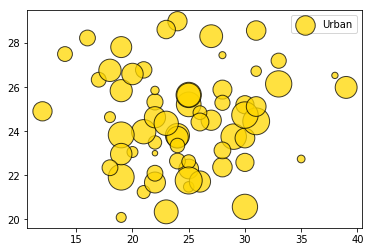

In [28]:
Urban, ax = plt.subplots()
Urban = plt.scatter(x_axis1,y_axis1,marker='o', s=driver_count1*10, alpha=0.75, color = "gold",
                    edgecolor ="black",label = 'Urban')
ax.legend()

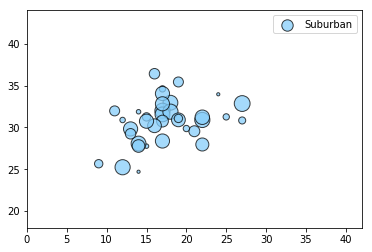

In [29]:
Suburban, ax = plt.subplots()

Suburban = plt.scatter(x_axis2,y_axis2,marker='o', s=driver_count2*10, alpha=0.75, color = "lightskyblue",
                       edgecolor ="black", label = 'Suburban')

Suburban = plt.xlim(0,42)
Suburban = plt.ylim(18,44)
ax.legend()

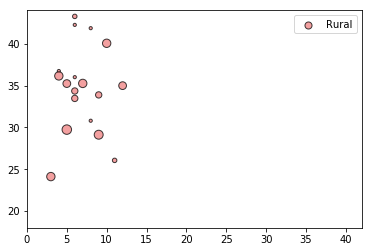

In [30]:
Rural, ax = plt.subplots()
Rural = plt.scatter(x_axis3,y_axis3 ,marker='o', s=driver_count3*10, alpha=0.75, color = "lightcoral", 
                    edgecolor ="black",label = 'Rural')
Rural = plt.xlim(0,42)
Rural = plt.ylim(18,44)
ax.legend()

In [31]:
# Build the scatter plots for each city types
x_axis = pd.merge(x_axis1.to_frame(), x_axis2.to_frame(), how="outer",on="city")
x_axis = pd.merge(x_axis, x_axis3.to_frame(), how="outer",on="city")
x_axis.head()

,ride_id_x,ride_id_y,ride_id
city,,,
Amandaburgh,18.0,NaN,NaN
Barajasview,22.0,NaN,NaN
Carriemouth,27.0,NaN,NaN
Christopherfurt,27.0,NaN,NaN
Deanville,19.0,NaN,NaN


In [32]:
y_axis = pd.merge(y_axis1.to_frame(), y_axis2.to_frame(), how="outer",on="city")
y_axis = pd.merge(y_axis, y_axis3.to_frame(), how="outer",on="city")

In [33]:
driver_count = pd.merge(driver_count1.to_frame(), driver_count2.to_frame(), how="outer",on="city")
driver_count = pd.merge(driver_count, driver_count3.to_frame(), how="outer",on="city")

In [34]:
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

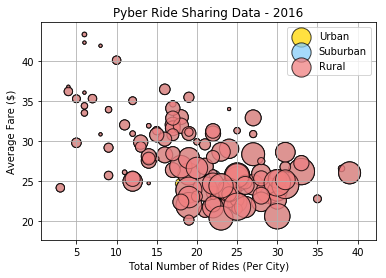

In [35]:
c = ["gold","lightskyblue","lightcoral"]

MyPlot, ax = plt.subplots()

for i in [0,1,2]:
    
    if i == 0:
        dotcolor = "gold"
    elif i == 1:
        dotcolor = "lightskyblue"
    elif i == 2:
        dotcolor = "lightcoral"
    
    ax.scatter(x_axis[i::],y_axis[i::],marker='o', s=driver_count[i::]*10, alpha=0.75, color = dotcolor,
                     edgecolor ="black", label=citytype[i])

ax.legend(loc="best")
ax.legend()
ax.grid(True)

plt.title("Pyber Ride Sharing Data - 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.show()

In [36]:
plt.savefig("RideSharingData-RafaelSantos-HW5.png")
plt.show()

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

In [37]:
# Calculate Type Percents
TotalFare = df.groupby('type')["fare"].sum()
TotalFare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

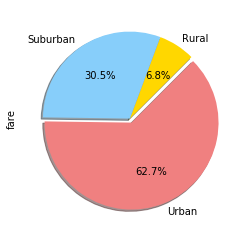

In [38]:
# Show Figure
fare_pie = TotalFare.plot(kind='pie', y= TotalFare, autopct="%1.1f%%", shadow= True, startangle=45,
                                labels=TotalFare.index, colors=c, explode = (0,0,0.05))

plt.show()

In [39]:
# Save
plt.tight_layout()
plt.savefig("TotalFaresCityType-RafaelSantos-HW5.png")
plt.show()

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

In [40]:
# Calculate Ride Percents
TotalRide = df.groupby('type')["ride_id"].count()

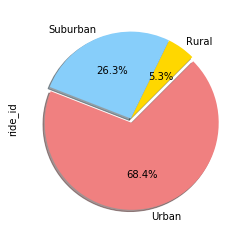

In [41]:
# Show Figure
ride_pie = TotalRide.plot(kind='pie', y= TotalRide, autopct="%1.1f%%", shadow= True, startangle=45,
                                labels=TotalRide.index, colors=c,explode=(0,0,0.05)) 

plt.show()

In [42]:
# Save
plt.tight_layout()
plt.savefig("TotalRidesCityType-RafaelSantos-HW5.png")
plt.show()

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

In [43]:
TotalDrivers = df.loc[df['type']!="", ['type','city','driver_count']]
TotalDrivers.drop_duplicates(subset='city', keep = 'first', inplace = True)
TotalDrivers = df.groupby('type')['driver_count'].sum()



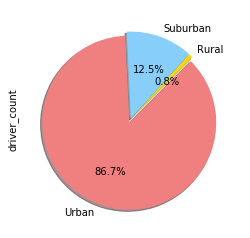

In [44]:
# Show Figure

drivers_pie = TotalDrivers.plot(kind='pie', y= TotalDrivers, autopct="%1.1f%%", shadow= True, startangle=45,
                                labels=TotalDrivers.index, colors=c,explode=(0,0,0.05)) 
plt.show()

### Note: duplicate counts were excluded.

In [45]:
# Save
plt.tight_layout()
plt.savefig("TotalDriversCityType-RafaelSantos-HW5.png")
plt.show()

<Figure size 432x288 with 0 Axes>